MNIST Handwrittem Digit Classification using Deep Learning (Neural Network)

Importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras. dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
# shape of the numpy arrays
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Traning data = 60000 images

Test data= 10000 images

Image Dimension = 28*28

Grayscale Image = 1 channel

In [ ]:
# printing the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


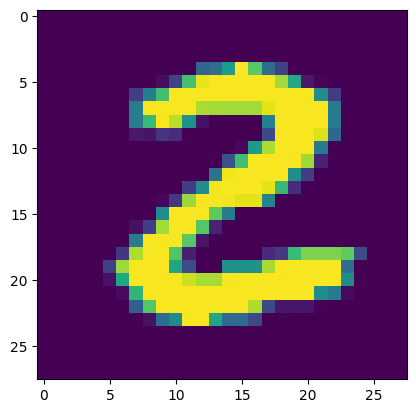

2


In [ ]:
# displaying the Image
plt.imshow(x_train[25])
plt.show()

# print the coresponding label

print(y_train[25])

Image Labels

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
# unique value in y_train

print(np.unique(y_train))

# unique value in y_test

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a comman dimention

In [ ]:
# scaling the values
x_train=x_train/255
x_test=x_test/255

Building the Neural Network NN

In [ ]:
# setting up the layers of the Neural Network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

In [ ]:
# compiling the neural network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# traning the neural network
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2944 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1361 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1020 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0836 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0702 - accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0398 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.034

Traning data accuracy is 98.84 %

Accuracy on Test data

In [ ]:
loss=accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0950 - accuracy: 0.9740


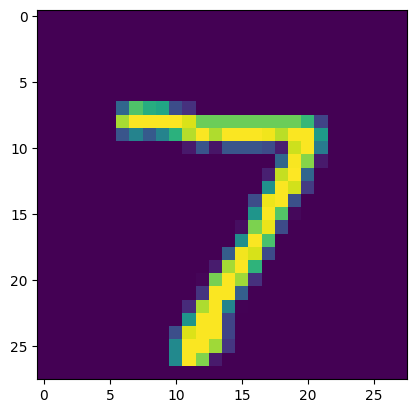

In [ ]:
# first data in my test data
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[1.0373569e-06 7.2524301e-03 3.0699197e-02 5.3663456e-01 8.9336344e-04
 8.9024015e-02 1.2916367e-09 9.9998462e-01 2.8448759e-03 1.4306994e-02]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
# converting the prediction probabilities to class label

label_for_first_test_image=np.argmax(y_pred[0])

In [ ]:
print(label_for_first_image)

7


In [ ]:
# converting the prediction probability to class label for all test data points

y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test -- > True labels

y_pred_labels -- > Predicted Labels

Confusion Matrix

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 966    0    2    0    1    2    4    1    3    1]
 [   0 1119    2    2    0    0    2    0   10    0]
 [   0    0 1017    1    2    2    2    2    5    1]
 [   0    0    6  973    0   15    0    4    8    4]
 [   1    1    7    1  955    2    5    0    0   10]
 [   2    1    0    6    1  874    2    0    4    2]
 [   4    2    3    1    1    8  933    0    6    0]
 [   0    0   12    6    3    0    0  996    4    7]
 [   4    0    5    3    3    7    2    5  943    2]
 [   2    2    0    6   17    6    1    6    4  965]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted labels')

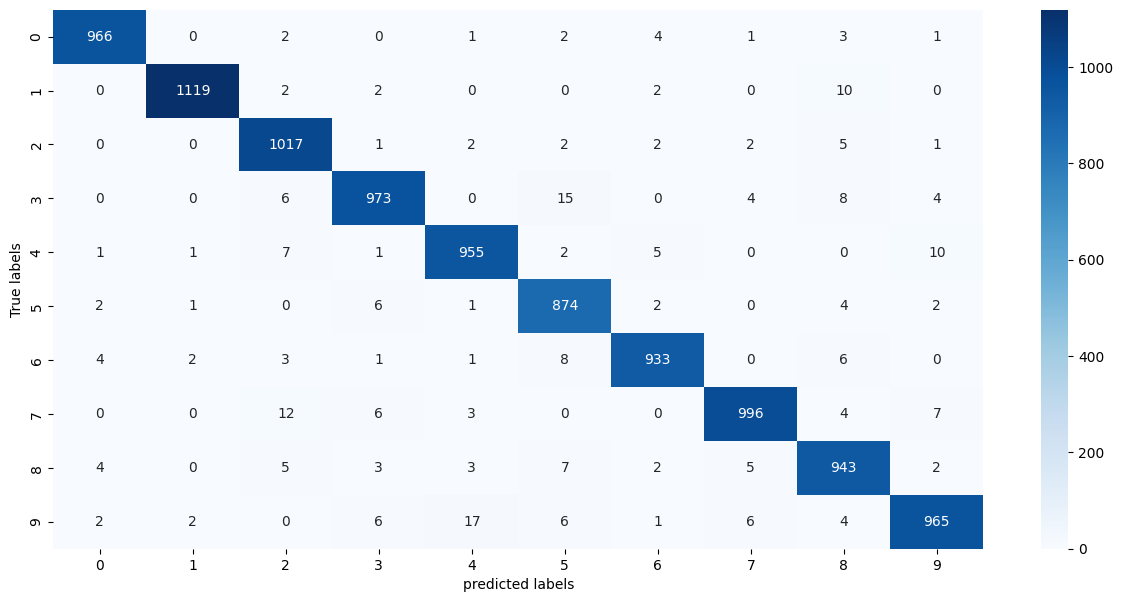

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('predicted labels')

Building a Predictive System

In [ ]:

input_image_path='/content/download.png'
input_image=cv2.imread(input_image_path)


In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[255 255 253]
  [255 255 253]
  [252 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 253]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 255 255]
  [255 255 255]
  [255 253 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


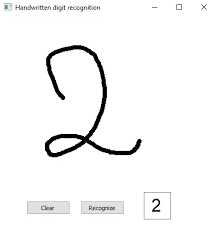

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(233, 216, 3)

In [ ]:
grayscale=cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(233, 216)

In [ ]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 23ms/step
[[7.1384314e-21 2.1350219e-10 1.0000000e+00 1.0000000e+00 0.0000000e+00
  1.0000000e+00 6.0014712e-28 1.3084965e-02 1.8831163e-09 3.3106500e-28]]


In [ ]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

2
